# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


Brief information about CIFAR10 Dataset

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent 

* airplanes (0)
* cars      (1)   
* birds     (2)
* cats      (3)
* deer      (4)
* dogs      (5)
* frogs     (6)
* horses    (7)
* ships     (8)
* trucks    (9)

There are 6,000 images of each class.

In [1]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
d = {0 : 'airplanes',
     1 : 'cars',
     2 : 'birds',
     3 : 'cats',
     4 : 'deer',
     5 : 'dogs',
     6 : 'frogs',
     7 : 'horses',
     8 : 'ships',
     9 : 'trucks'}

def get_img_object_name(idx):
    return d[idx]

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [4]:
# Let's inspect the shape of these images
x_train.shape, x_test.shape
# So there are 50K Training images; each image is 32*32 with 3 Channels
# And 10K Testing images

((50000, 32, 32, 3), (10000, 32, 32, 3))

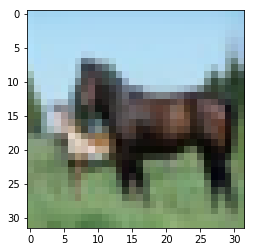

In [5]:
# Let's inspect one of the images
img_idx = 12

plt.imshow(x_train[img_idx].astype('int32'))
plt.show()

In [6]:
# Let's discet the image into 3 frames
r = x_train[img_idx][:, :, 0]
g = x_train[img_idx][:, :, 1]
b = x_train[img_idx][:, :, 2]

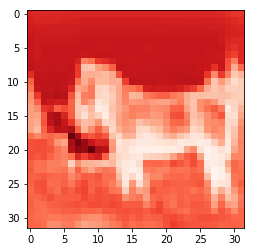

In [7]:
plt.imshow(r, cmap="Reds")
plt.show()

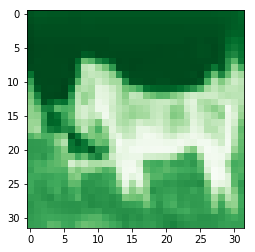

In [8]:
plt.imshow(g, cmap="Greens")
plt.show()

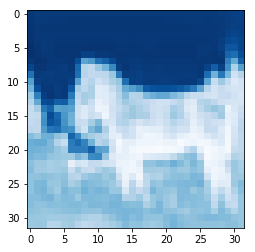

In [9]:
plt.imshow(b, cmap="Blues")
plt.show()

In [10]:
# Let's see what image is this
get_img_object_name(y_train[img_idx].item())

'horses'

In [11]:
lst_train_0_4 = ((y_train >= 0) & (y_train < 5)).flatten().tolist() 
lst_train_5_9 = ((y_train > 4) & (y_train < 10)).flatten().tolist()

lst_test_0_4 = ((y_test >= 0) & (y_test < 5)).flatten().tolist() 
lst_test_5_9 = ((y_test > 4) & (y_test < 10)).flatten().tolist()

x_train_0_4 = x_train[lst_train_0_4]
x_train_5_9 = x_train[lst_train_5_9]

x_test_0_4 = x_test[lst_test_0_4]
x_test_5_9 = x_test[lst_test_5_9]

#Normalizing the input
x_train_0_4 /= 255
x_test_0_4 /= 255

x_train_5_9 /= 255
x_test_5_9 /= 255

In [12]:
x_train_0_4.shape, x_train_5_9.shape, x_test_0_4.shape, x_test_5_9.shape

((25000, 32, 32, 3), (25000, 32, 32, 3), (5000, 32, 32, 3), (5000, 32, 32, 3))

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [13]:
num_classes = 5

y_train_0_4_base = y_train[lst_train_0_4]
y_train_5_9_base = y_train[lst_train_5_9] - 5

y_test_0_4_base = y_test[lst_test_0_4]
y_test_5_9_base = y_test[lst_test_5_9] - 5


y_train_0_4 = keras.utils.to_categorical(y_train_0_4_base, num_classes)
y_test_0_4 = keras.utils.to_categorical(y_test_0_4_base, num_classes)

y_train_5_9 = keras.utils.to_categorical(y_train_5_9_base, num_classes)
y_test_5_9 = keras.utils.to_categorical(y_test_5_9_base, num_classes)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [14]:
input_shape = (32, 32, 3)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

In [16]:
#Initialize the model
# I have arrived to this model after some experiments. In my GitHub, same location as this ipynb file, you should see a PDF 
# named CiFar10_Optimization_Observations.pdf that mentions different experiments I performed.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model.add(BatchNormalization(name='batch_norm_1'))
model.add(Dropout(0.25, name='drop_11'))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', name='conv_2',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model.add(BatchNormalization(name='batch_norm_2'))
model.add(Dropout(0.25, name='drop_22'))

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu', name='conv_3',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_3'))
model.add(BatchNormalization(name='batch_norm_3'))
model.add(Dropout(0.50, name='drop_33'))

#model.add(Conv2D(256, kernel_size=(3, 3),
#                 activation='relu', name='conv_4',
#                 kernel_regularizer=regularizers.l2(0.01)))
#model.add(MaxPooling2D(pool_size=(2, 2),name='max_4'))
#model.add(BatchNormalization(name='batch_norm_4'))

model.add(Flatten())

model.add(Dense(128, activation='relu',name='dense_1'))
model.add(BatchNormalization(name='batch_norm_5'))
model.add(Dropout(0.5, name='drop_2'))

model.add(Dense(num_classes, activation='softmax',name='dense_2'))

model.summary()

W1018 14:06:46.188914 22668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 14:06:46.226003 22668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 14:06:46.232441 22668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1018 14:06:46.285631 22668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1018 14:06:46.331171 22668 deprecation_wrapper.py:119] From C:\

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 15, 15, 32)        128       
_________________________________________________________________
drop_11 (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 6, 6, 64)         

In [17]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.losses import categorical_crossentropy

optimizer = Adagrad()
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

W1018 14:06:51.205448 22668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
BATCH_SIZE = 256
EPOCHS = 100

W1018 14:06:51.605519 22668 deprecation.py:323] From C:\Users\Beejal\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 5000 samples
Epoch 1/100
25000/25000 [==============================] - 16s 656us/step - loss: 2.2908 - acc: 0.5116 - val_loss: 1.9008 - val_acc: 0.4670
Epoch 2/100
25000/25000 [==============================] - 10s 405us/step - loss: 1.5732 - acc: 0.6067 - val_loss: 1.3612 - val_acc: 0.6466
Epoch 3/100
25000/25000 [==============================] - 10s 408us/step - loss: 1.3022 - acc: 0.6522 - val_loss: 1.4597 - val_acc: 0.5398
Epoch 4/100
25000/25000 [==============================] - 9s 355us/step - loss: 1.1502 - acc: 0.6754 - val_loss: 1.0816 - val_acc: 0.6924
Epoch 5/100
25000/25000 [==============================] - 8s 323us/step - loss: 1.0512 - acc: 0.7010 - val_loss: 0.9594 - val_acc: 0.7278
Epoch 6/100
25000/25000 [==============================] - 7s 296us/step - loss: 0.9788 - acc: 0.7131 - val_loss: 1.3218 - val_acc: 0.5664
Epoch 7/100
25000/25000 [==============================] - 9s 360us/step - loss: 0.9206 - acc: 0.7270 - val_loss: 

25000/25000 [==============================] - 3s 125us/step - loss: 0.4759 - acc: 0.8655 - val_loss: 0.5727 - val_acc: 0.8328
Epoch 60/100
25000/25000 [==============================] - 3s 125us/step - loss: 0.4766 - acc: 0.8634 - val_loss: 0.5007 - val_acc: 0.8548
Epoch 61/100
25000/25000 [==============================] - 3s 124us/step - loss: 0.4694 - acc: 0.8686 - val_loss: 0.5331 - val_acc: 0.8468
Epoch 62/100
25000/25000 [==============================] - 3s 127us/step - loss: 0.4698 - acc: 0.8676 - val_loss: 0.5283 - val_acc: 0.8478
Epoch 63/100
25000/25000 [==============================] - 3s 131us/step - loss: 0.4667 - acc: 0.8668 - val_loss: 0.5076 - val_acc: 0.8524
Epoch 00063: early stopping


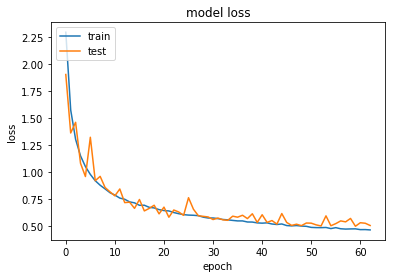

In [19]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]   # [stats, early_stopping]

#Training on the dataset
history = model.fit(x_train_0_4, y_train_0_4,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              verbose=1,
              validation_data=(x_test_0_4, y_test_0_4),
              callbacks=callback_list)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

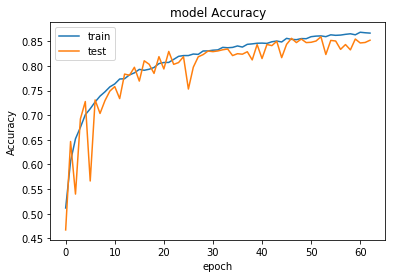

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [21]:
# So with just making Dense layers trainable, I could achieve 82-83% accuracy. In order to achieve more, 
# in addition to Dense layers below I made one of the last Conv Layers (conv_3) learnable.

In [22]:
for layer in model.layers:
    if ((type(layer) != keras.layers.core.Dense) & (layer.name != 'conv_3')):
        layer.trainable = False


In [23]:
# Since the trainability has changed, we need to recompile the model
# If not done, it will give following warning while fitting the model
# C:\Users\Beejal\Anaconda3\lib\site-packages\keras\engine\training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
#  'Discrepancy between trainable weights and collected trainable'

optimizer = Adagrad()
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Train on 25000 samples, validate on 5000 samples
Epoch 1/100
25000/25000 [==============================] - 3s 123us/step - loss: 0.8495 - acc: 0.7826 - val_loss: 0.9728 - val_acc: 0.7828
Epoch 2/100
25000/25000 [==============================] - 2s 85us/step - loss: 0.6442 - acc: 0.8359 - val_loss: 0.8101 - val_acc: 0.8188
Epoch 3/100
25000/25000 [==============================] - 2s 80us/step - loss: 0.5967 - acc: 0.8464 - val_loss: 0.7372 - val_acc: 0.8230
Epoch 4/100
25000/25000 [==============================] - 2s 79us/step - loss: 0.5672 - acc: 0.8540 - val_loss: 0.7028 - val_acc: 0.8318
Epoch 5/100
25000/25000 [==============================] - 2s 79us/step - loss: 0.5438 - acc: 0.8566 - val_loss: 0.6762 - val_acc: 0.8344
Epoch 6/100
25000/25000 [==============================] - 2s 79us/step - loss: 0.5254 - acc: 0.8667 - val_loss: 0.6436 - val_acc: 0.8412
Epoch 7/100
25000/25000 [==============================] - 2s 79us/step - loss: 0.5114 - acc: 0.8697 - val_loss: 0.6302 - 

25000/25000 [==============================] - 2s 88us/step - loss: 0.3756 - acc: 0.9046 - val_loss: 0.4391 - val_acc: 0.8916
Epoch 60/100
25000/25000 [==============================] - 2s 82us/step - loss: 0.3758 - acc: 0.9040 - val_loss: 0.4450 - val_acc: 0.8884
Epoch 61/100
25000/25000 [==============================] - 2s 79us/step - loss: 0.3709 - acc: 0.9070 - val_loss: 0.4343 - val_acc: 0.8912
Epoch 62/100
25000/25000 [==============================] - 2s 81us/step - loss: 0.3729 - acc: 0.9047 - val_loss: 0.4460 - val_acc: 0.8874
Epoch 63/100
25000/25000 [==============================] - 2s 84us/step - loss: 0.3670 - acc: 0.9058 - val_loss: 0.4281 - val_acc: 0.8948
Epoch 64/100
25000/25000 [==============================] - 2s 88us/step - loss: 0.3671 - acc: 0.9076 - val_loss: 0.4116 - val_acc: 0.9008
Epoch 65/100
25000/25000 [==============================] - 2s 83us/step - loss: 0.3773 - acc: 0.9022 - val_loss: 0.4192 - val_acc: 0.8962
Epoch 66/100
25000/25000 [==============

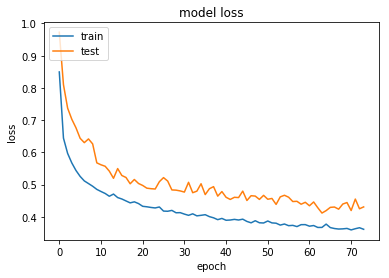

In [24]:
history = model.fit(x_train_5_9, y_train_5_9,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              verbose=1,
              validation_data=(x_test_5_9, y_test_5_9),
              callbacks=callback_list)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [25]:
# So with this small change, we are now able to achieve more than 85.00% Accuracy. Hurray!

In [26]:
# Now let's evaluate the model.
from sklearn.metrics import classification_report, accuracy_score, f1_score

y_train_pred_5_9 = model.predict(x_train_5_9)
y_test_pred_5_9 = model.predict(x_test_5_9)

y_train_pred = np.argmax(y_train_pred_5_9, axis=1) + 5
y_test_pred = np.argmax(y_test_pred_5_9, axis=1) + 5

In [27]:
print("-" * 54)
print("Classification Report for Train Data : ")
print("-" * 54)
print("-" * 54)
print(classification_report((y_train_5_9_base + 5), y_train_pred))

------------------------------------------------------
Classification Report for Train Data : 
------------------------------------------------------
------------------------------------------------------
              precision    recall  f1-score   support

           5       0.98      0.88      0.93      5000
           6       0.98      0.95      0.97      5000
           7       0.93      0.97      0.95      5000
           8       0.93      0.99      0.96      5000
           9       0.96      0.97      0.97      5000

    accuracy                           0.95     25000
   macro avg       0.96      0.95      0.95     25000
weighted avg       0.96      0.95      0.95     25000



In [28]:
print("-" * 54)
print("Classification Report for Test Data : ")
print("-" * 54)
print("-" * 54)
print(classification_report((y_test_5_9_base + 5), y_test_pred))

------------------------------------------------------
Classification Report for Test Data : 
------------------------------------------------------
------------------------------------------------------
              precision    recall  f1-score   support

           5       0.91      0.77      0.83      1000
           6       0.94      0.89      0.91      1000
           7       0.85      0.91      0.88      1000
           8       0.87      0.96      0.91      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# Text classification using TF-IDF

Brief information about __20 Newsgroup Dataset__

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Data Set Characteristics:

| Column 1       | Column 2     | 
| :------------- | ----------:  | 
|  Classes       | 20           | 
| Samples total  | 18846        | 
| Dimensionality | 1            | 
| Features       | text         | 


### 6. Load the dataset from sklearn.datasets

In [29]:
from sklearn.datasets import fetch_20newsgroups

In [30]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [31]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [32]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [33]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [34]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [35]:
twenty_train.data[0], twenty_train.target[0]

('From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 1)

In [36]:
twenty_train.data[1], twenty_train.target[1]

("From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the problem:\n\tI have a rectangular mesh in the uv domain, i.e  the mesh is a \n\tmapping of a 3d Bezier patch into 2d. The area in this domain\n\twhich is inside a trimming loop had to be rendered. The trimming\n\tloop is a set of 2d Bezier curve segments.\n\tFor the sake of notation: the mesh is made up of cells.\n\n\tMy problem is this :\n\tThe trimming area has to be split up into individual smaller\n\tcells bounded by the trimming curve segments. If a cell\n\tis wholly inside the area...then it is output as a whole ,\n\telse it is trivially rejected. \n\n\tDoes any body know how thiss can be done, or is there any algo. \n\tsomewhere for doing this.\n\n\tAny help would be appreciated.\n\n\tThanks, \n\tAni.

In [37]:
twenty_train.data[2], twenty_train.target[2]

("From: djohnson@cs.ucsd.edu (Darin Johnson)\nSubject: Re: harrassed at work, could use some prayers\nOrganization: =CSE Dept., U.C. San Diego\nLines: 63\n\n(Well, I'll email also, but this may apply to other people, so\nI'll post also.)\n\n>I've been working at this company for eight years in various\n>engineering jobs.  I'm female.  Yesterday I counted and realized that\n>on seven different occasions I've been sexually harrassed at this\n>company.\n\n>I dreaded coming back to work today.  What if my boss comes in to ask\n>me some kind of question...\n\nYour boss should be the person bring these problems to.  If he/she\ndoes not seem to take any action, keep going up higher and higher.\nSexual harrassment does not need to be tolerated, and it can be an\nenormous emotional support to discuss this with someone and know that\nthey are trying to do something about it.  If you feel you can not\ndiscuss this with your boss, perhaps your company has a personnel\ndepartment that can work for 

In [38]:
twenty_train.data[3], twenty_train.target[3]

('From: s0612596@let.rug.nl (M.M. Zwart)\nSubject: catholic church poland\nOrganization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL\nLines: 10\n\nHello,\n\nI\'m writing a paper on the role of the catholic church in Poland after 1989. \nCan anyone tell me more about this, or fill me in on recent books/articles(\nin english, german or french). Most important for me is the role of the \nchurch concerning the abortion-law, religious education at schools,\nbirth-control and the relation church-state(government). Thanx,\n\n                                                 Masja,\n"M.M.Zwart"<s0612596@let.rug.nl>\n',
 3)

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vect = TfidfVectorizer(stop_words='english', min_df=2)
x_train_trnsfrmed = vect.fit_transform(twenty_train.data)
x_test_trnsfrmed = vect.transform(twenty_test.data)

In [41]:
x_train_trnsfrmed.shape, x_test_trnsfrmed.shape

((2257, 18193), (1502, 18193))

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [42]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train_trnsfrmed, twenty_train.target)

C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred_lr = model_lr.predict(x_test_trnsfrmed)

In [44]:
print(classification_report(twenty_test.target, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       319
           1       0.87      0.98      0.92       389
           2       0.94      0.90      0.92       396
           3       0.87      0.95      0.91       398

    accuracy                           0.90      1502
   macro avg       0.91      0.89      0.90      1502
weighted avg       0.91      0.90      0.90      1502

